In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

In [5]:
df = pd.read_csv('BTC_Hourly_Six_Years.csv')

In [6]:
df

,close,high,low,open,timestamp,volume
0,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325
1,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795
2,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557
3,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721
4,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199
...,...,...,...,...,...,...
52579,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587
52580,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314
52581,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604
52582,26886.00,26915.00,26862.00,26875.00,1696024800,58.682014


In [7]:
# Get the date from the timestamp
df['datetime'] = df['timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df

,close,high,low,open,timestamp,volume,datetime
0,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325,2017-09-30 00:00:00
1,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795,2017-09-30 01:00:00
2,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557,2017-09-30 02:00:00
3,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721,2017-09-30 03:00:00
4,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199,2017-09-30 04:00:00
...,...,...,...,...,...,...,...
52579,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587,2023-09-29 19:00:00
52580,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314,2023-09-29 20:00:00
52581,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604,2023-09-29 21:00:00
52582,26886.00,26915.00,26862.00,26875.00,1696024800,58.682014,2023-09-29 22:00:00


In [8]:
df.set_index('datetime', inplace=True)

In [9]:
df

,close,high,low,open,timestamp,volume
datetime,,,,,,
2017-09-30 00:00:00,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325
2017-09-30 01:00:00,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795
2017-09-30 02:00:00,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557
2017-09-30 03:00:00,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721
2017-09-30 04:00:00,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199
...,...,...,...,...,...,...
2023-09-29 19:00:00,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587
2023-09-29 20:00:00,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314
2023-09-29 21:00:00,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604


In [10]:
df['realized_vol'] = (df['close'] - df['close'].shift(1)) / df['close'].shift(1) * 100


In [11]:
df['realized_absolute_vol'] = abs(df['realized_vol'])
df

,close,high,low,open,timestamp,volume,realized_vol,realized_absolute_vol
datetime,,,,,,,,
2017-09-30 00:00:00,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325,NaN,NaN
2017-09-30 01:00:00,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795,0.767706,0.767706
2017-09-30 02:00:00,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557,-0.114302,0.114302
2017-09-30 03:00:00,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721,-0.300000,0.300000
2017-09-30 04:00:00,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199,0.065621,0.065621
...,...,...,...,...,...,...,...,...
2023-09-29 19:00:00,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587,-0.007429,0.007429
2023-09-29 20:00:00,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314,-0.040865,0.040865
2023-09-29 21:00:00,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604,-0.118928,0.118928


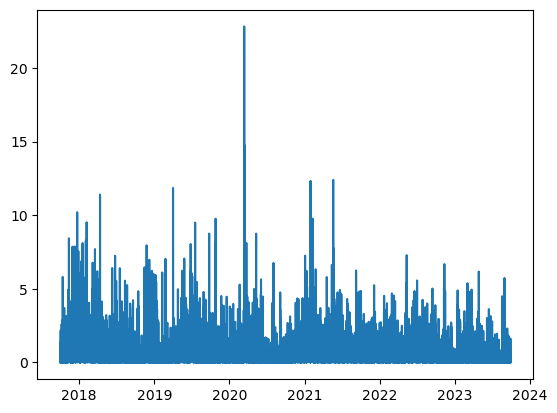

In [12]:
#plt.plot(df['close'])
plt.plot(df['realized_absolute_vol'])

In [51]:
df1 = df.loc[:, [ 'close']]

In [52]:
df1

,close
datetime,
2017-09-30 00:00:00,4176.08
2017-09-30 01:00:00,4208.14
2017-09-30 02:00:00,4203.33
2017-09-30 03:00:00,4190.72
2017-09-30 04:00:00,4193.47
...,...
2023-09-29 19:00:00,26918.00
2023-09-29 20:00:00,26907.00
2023-09-29 21:00:00,26875.00


In [61]:
df_realized = df.loc[:, ['realized_absolute_vol']]
df_realized = df_realized.drop(pd.to_datetime('2017-09-30 00:00:00'))

In [62]:
df_realized

,realized_absolute_vol
datetime,
2017-09-30 01:00:00,0.767706
2017-09-30 02:00:00,0.114302
2017-09-30 03:00:00,0.300000
2017-09-30 04:00:00,0.065621
2017-09-30 05:00:00,0.750691
...,...
2023-09-29 19:00:00,0.007429
2023-09-29 20:00:00,0.040865
2023-09-29 21:00:00,0.118928


In [10]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df1)

In [11]:
pvalue

0.5086496730885429

In [63]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df_realized)

In [64]:
pvalue

1.6332063104431779e-26

In [12]:
# Make data stationary
df1_diff = df1.diff().dropna()
df1_diff

,close
datetime,
2017-09-30 01:00:00,32.06
2017-09-30 02:00:00,-4.81
2017-09-30 03:00:00,-12.61
2017-09-30 04:00:00,2.75
2017-09-30 05:00:00,31.48
...,...
2023-09-29 19:00:00,-2.00
2023-09-29 20:00:00,-11.00
2023-09-29 21:00:00,-32.00


<Figure size 1200x600 with 0 Axes>

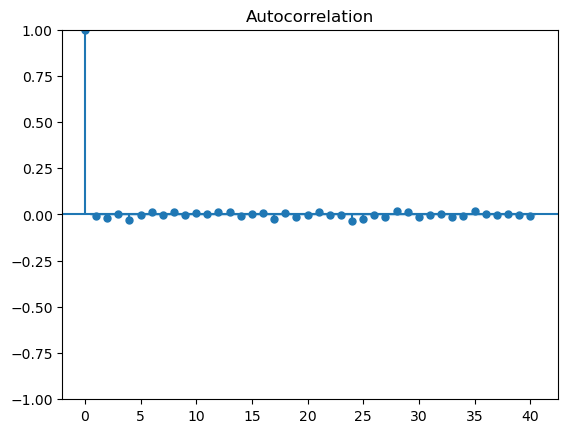

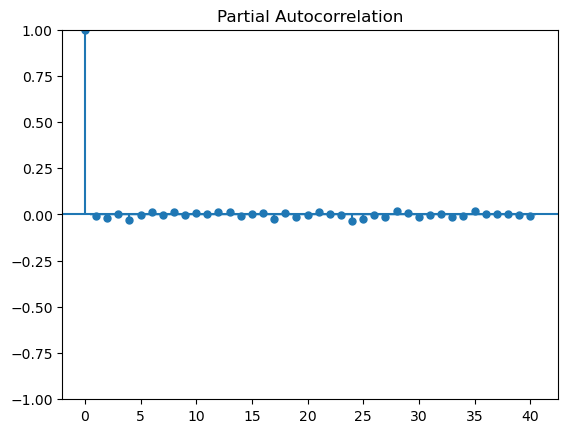

In [13]:
# Plot ACF and PACF plots to determine the order of ARIMA (p, d, q)
plt.figure(figsize=(12, 6))
plot_acf(df1_diff, lags=40)
plot_pacf(df1_diff, lags=40)
plt.show()

In [18]:
# Build and fit the ARIMA model
p, d, q = (3, 1, 3)
model = ARIMA(df1, order=(p, d, q))
model_fit = model.fit()

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [65]:
# Build and fit the ARIMA model on realized vol
p, d, q = (1, 1, 1) # NEEDS WORK
model = ARIMA(df_realized, order=(p, d, q))
model_fit = model.fit()

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [66]:
# Make forecasts
forecast_period = 10  # Can be changed for more or less periods
forecast = model_fit.forecast(steps=forecast_period)

# Print the forecasts
print("ARIMA Forecasts:\n", forecast)

ARIMA Forecasts:
 2023-09-30 00:00:00    0.168030
2023-09-30 01:00:00    0.173207
2023-09-30 02:00:00    0.173564
2023-09-30 03:00:00    0.173589
2023-09-30 04:00:00    0.173590
2023-09-30 05:00:00    0.173590
2023-09-30 06:00:00    0.173590
2023-09-30 07:00:00    0.173590
2023-09-30 08:00:00    0.173590
2023-09-30 09:00:00    0.173590
Freq: H, Name: predicted_mean, dtype: float64


In [19]:
# Make forecasts
forecast_period = 10  # Can be changed for more or less periods
forecast = model_fit.forecast(steps=forecast_period)

# Print the forecasts
print("ARIMA Forecasts:\n", forecast)

ARIMA Forecasts:
 2023-09-30 00:00:00    26911.450147
2023-09-30 01:00:00    26911.274610
2023-09-30 02:00:00    26910.976722
2023-09-30 03:00:00    26911.439518
2023-09-30 04:00:00    26910.898510
2023-09-30 05:00:00    26911.162165
2023-09-30 06:00:00    26911.155535
2023-09-30 07:00:00    26910.826760
2023-09-30 08:00:00    26911.227784
2023-09-30 09:00:00    26910.848504
Freq: H, Name: predicted_mean, dtype: float64


In [16]:
arima_model = auto_arima(df1, start_p=1, d=1, start_q=1, max_p=5, max_q=5, seasonal=False)

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

In [67]:
arima_model_realized = auto_arima(df_realized, start_p=1, d=1, start_q=1, max_p=5, max_q=5, seasonal=False)


/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

In [68]:
arima_model_realized

ARIMA(order=(5, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
arima_model

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)